In [1]:
# 手写数字
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-10-21 18:34:01.833049: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train_all.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

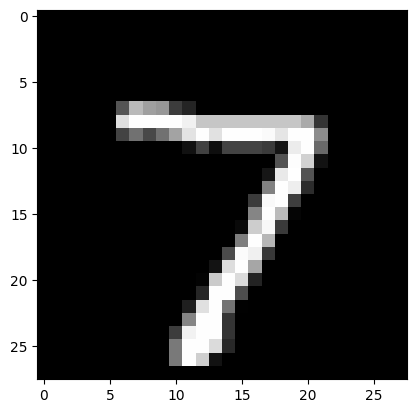

In [5]:
plt.imshow(x_test[0], cmap='gray')

In [6]:
y_test[0]

7

In [7]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [8]:
x_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
# 对数据进行标准化处理, 
# x - u / s
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [10]:
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 另一种写法. 
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

2023-10-21 18:34:55.708650: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [12]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3238 - accuracy: 0.9066 - val_loss: 0.1804 - val_accuracy: 0.9522
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1588 - accuracy: 0.9550 - val_loss: 0.1349 - val_accuracy: 0.9634
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1168 - accuracy: 0.9661 - val_loss: 0.1127 - val_accuracy: 0.9690
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0917 - accuracy: 0.9739 - val_loss: 0.1011 - val_accuracy: 0.9720
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0747 - accuracy: 0.9789 - val_loss: 0.0932 - val_accuracy: 0.9734
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0616 - accuracy: 0.9830 - val_loss: 0.0849 - val_accuracy: 0.9754
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9863 - val_loss: 0.0803 - val_accuracy:

In [13]:
history.history

{'loss': [0.3237842619419098,
  0.15878941118717194,
  0.11683323979377747,
  0.09167901426553726,
  0.07469630986452103,
  0.06163552403450012,
  0.051952242851257324,
  0.04409458115696907,
  0.037481408566236496,
  0.032157037407159805],
 'accuracy': [0.9066181778907776,
  0.9549999833106995,
  0.9660727381706238,
  0.9739090800285339,
  0.9788908958435059,
  0.9829636216163635,
  0.9863454699516296,
  0.9885636568069458,
  0.9901636242866516,
  0.9921818375587463],
 'val_loss': [0.18043194711208344,
  0.13489045202732086,
  0.11273093521595001,
  0.10114483535289764,
  0.09324949979782104,
  0.0849115252494812,
  0.08028445392847061,
  0.07772761583328247,
  0.07353805750608444,
  0.07003630697727203],
 'val_accuracy': [0.9521999955177307,
  0.9634000062942505,
  0.968999981880188,
  0.972000002861023,
  0.9733999967575073,
  0.9753999710083008,
  0.9769999980926514,
  0.9771999716758728,
  0.980400025844574,
  0.9793999791145325]}

In [14]:
import pandas as pd

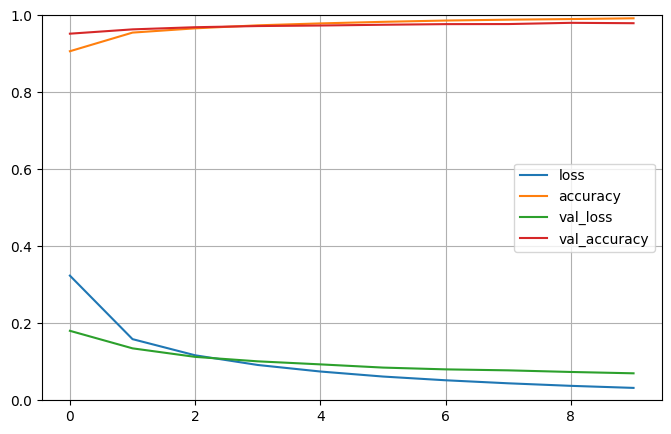

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9773


[0.07469367980957031, 0.9772999882698059]

In [17]:
# 过拟合怎么办. 正则化的方法: L1, L2, droptout, BN, 

In [18]:
# l1正则
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l1'))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l1'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 30.0036 - accuracy: 0.8203 - val_loss: 1.5713 - val_accuracy: 0.8414
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.4394 - accuracy: 0.8460 - val_loss: 1.3207 - val_accuracy: 0.8696
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2921 - accuracy: 0.8609 - val_loss: 1.2381 - val_accuracy: 0.8712
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2219 - accuracy: 0.8656 - val_loss: 1.1891 - val_accuracy: 0.8686
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1769 - accuracy: 0.8701 - val_loss: 1.1365 - val_accuracy: 0.8788
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1464 - accuracy: 0.8709 - val_loss: 1.1394 - val_accuracy: 0.8758
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1230 - accuracy: 0.8717 - val_loss: 1.0852 - val_accuracy

In [24]:
# l2正则
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 8.7453 - accuracy: 0.8504 - val_loss: 5.1269 - val_accuracy: 0.9422
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 4.4164 - accuracy: 0.9415 - val_loss: 2.7255 - val_accuracy: 0.9554
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3693 - accuracy: 0.9516 - val_loss: 1.5228 - val_accuracy: 0.9580
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3393 - accuracy: 0.9563 - val_loss: 0.9080 - val_accuracy: 0.9630
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8212 - accuracy: 0.9593 - val_loss: 0.5965 - val_accuracy: 0.9658
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5497 - accuracy: 0.9629 - val_loss: 0.4373 - val_accuracy: 0.9666
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4125 - accuracy: 0.9659 - val_loss: 0.3474 - val_accuracy:

In [25]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2620 - accuracy: 0.9692


[0.26196080446243286, 0.9692000150680542]

In [27]:
# dropout
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# 改进版的dropout, 1: 均值和方差不变. 2. 归一化的性质也不变. 
model.add(tf.keras.layers.AlphaDropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4544 - accuracy: 0.5042 - val_loss: 0.4886 - val_accuracy: 0.8892
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5890 - accuracy: 0.8073 - val_loss: 0.4078 - val_accuracy: 0.9130
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4929 - accuracy: 0.8434 - val_loss: 0.3585 - val_accuracy: 0.9228
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4413 - accuracy: 0.8617 - val_loss: 0.3195 - val_accuracy: 0.9332
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3971 - accuracy: 0.8758 - val_loss: 0.2834 - val_accuracy: 0.9410
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8834 - val_loss: 0.2572 - val_accuracy: 0.9466
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3530 - accuracy: 0.8883 - val_loss: 0.2490 - val_accuracy:

In [28]:
# BN, 
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4599 - accuracy: 0.8608 - val_loss: 0.1326 - val_accuracy: 0.9612
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1405 - accuracy: 0.9585 - val_loss: 0.0992 - val_accuracy: 0.9698
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0937 - accuracy: 0.9732 - val_loss: 0.0875 - val_accuracy: 0.9736
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0693 - accuracy: 0.9813 - val_loss: 0.0805 - val_accuracy: 0.9746
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0553 - accuracy: 0.9846 - val_loss: 0.0784 - val_accuracy: 0.9774
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0418 - accuracy: 0.9892 - val_loss: 0.0729 - val_accuracy: 0.9778
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0351 - accuracy: 0.9913 - val_loss: 0.0706 - val_accuracy:

In [29]:
# 把BN放在激活之前
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5529 - accuracy: 0.8418 - val_loss: 0.1551 - val_accuracy: 0.9570
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1739 - accuracy: 0.9510 - val_loss: 0.1134 - val_accuracy: 0.9698
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1305 - accuracy: 0.9640 - val_loss: 0.0980 - val_accuracy: 0.9720
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1043 - accuracy: 0.9699 - val_loss: 0.0859 - val_accuracy: 0.9756
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0811 - accuracy: 0.9777 - val_loss: 0.0795 - val_accuracy: 0.9772
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0690 - accuracy: 0.9814 - val_loss: 0.0740 - val_accuracy: 0.9776
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0578 - accuracy: 0.9852 - val_loss: 0.0707 - val_accuracy:

In [30]:
# Deep Nerual Network
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 57s 31ms/step - loss: 1.1014 - accuracy: 0.6452 - val_loss: 0.2391 - val_accuracy: 0.9354
Epoch 2/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.4031 - accuracy: 0.8860 - val_loss: 0.1601 - val_accuracy: 0.9550
Epoch 3/10
1719/1719 [==============================] - 54s 31ms/step - loss: 0.2799 - accuracy: 0.9200 - val_loss: 0.1251 - val_accuracy: 0.9638
Epoch 4/10
1719/1719 [==============================] - 52s 30ms/step - loss: 0.2090 - accuracy: 0.9418 - val_loss: 0.1154 - val_accuracy: 0.9696
Epoch 5/10
1719/1719 [==============================] - 51s 30ms/step - loss: 0.1749 - accuracy: 0.9509 - val_loss: 0.1096 - val_accuracy: 0.9696
Epoch 6/10
1719/1719 [==============================] - 52s 30ms/step - loss: 0.1514 - accuracy: 0.9573 - val_loss: 0.0917 - val_accuracy: 0.9730
Epoch 7/10
1719/1719 [==============================] - 52s 31ms/step - loss: 0.1270 - accuracy: 0.9646 - val_loss: 0.0883 -

In [31]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_3 (Activation)    (None, 256)              

In [32]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0868 - accuracy: 0.9730


[0.08680325746536255, 0.9729999899864197]

In [ ]:
# 1. 参数多了, 容易训练不充分. 
# 2. 容易梯度消失/梯度爆炸. 